# Terminal Velocity
by [Paulo Marques](http://pmarques.eu), 2014/02/27

---

This notebook discusses the <a href="http://en.wikipedia.org/wiki/Drag_(physics)">drag forces</a> exerted on a body when traveling through air. It's also done in [Julia](julialang.org) so that I can better understand the potencial of the language.

![](http://upload.wikimedia.org/wikipedia/en/8/89/Parachuters_in_hybrid_formation.jpg)  

---

A falling body is subject to two forces: a downward force, $\vec{F_g}$, due to gravity, and an upward force $\vec{F_a}$, due to air resistance. Let's consider a body with mass $m$. Assuming an upward oriented YY axis, the following applies:

$$ F_g = - g \cdot m $$

$$ F_a = - sgn(v) \cdot {1 \over 2} \rho C_D A v^2 $$

In these formulas, $m$ is the mass of the body, $\rho$ is the density of air ($\approx 1.2 Kg/m^3$), $g$ is the accelaration of gravity ($\approx 9.8 m/s^2$), $v$ is the velocity of the body, $C_D$ is the drag coeficient of the body and $A$ is its cross-section area. $sgn(x)$ is the sign function that given a number returns +1 for positives and -1 for negatives. In the formula it makes the force always contrary to the movement of the body.

Thus, the resulting force $\vec{F}$ experienced by the body is:

$$ F = - g \cdot m - sgn(v) \cdot {1 \over 2} \rho C_D A v^2 $$

Given that force is directly related to accelaration, and accelaration to velocity:

$$ v = \frac{dy}{dt} $$

$$ F = m \cdot \frac{dv}{dt} $$

substituting, we get this differencial equation:

$$ m \cdot \frac{dv}{dt} = - g \cdot m - sgn(v) \cdot {1 \over 2} \rho C_D A v^2 $$

In fact, this can be expressed as a system of differential equations in the form ${\bf f}' = {\bf g}({\bf f}, t)$:

$$ \begin{cases} \frac{dy}{dt} = v \\\\ \frac{dv}{dt} = -g - sgn(v) \cdot {1 \over 2} {\rho \over m} C_D A v^2 \end{cases} $$

---

So, let's simulate this with Julia.

Let's start by importing some basic libraries:

In [1]:
using PyPlot
using ODE;

We now define the initial conditions and constants of the problem.

In [2]:
# Constants 
g  = 9.8                # Accelaration of gravity
p  = 1.2                # Density of air

# Caracteristics of the problem
m  = 0.100              # A 100 g ball
r  = 0.10               # 10 cm radius
Cd = 0.5                # Drag coeficient for a small spherical object
y0 = 1000.0             # Initial height of the body (1000 m)
v0 = 10.0               # Initial velocity of the body (10 m/s^2, going up)
A  = pi*r^2;            # Cross-section area of the body;

As said, let's define a system of ordinary differential equations in its normal form ${\bf f}' = {\bf g}({\bf f}, t)$. (In the code bellow we substitute $g()$ for $gm()$ so that it doesn't clash with the acceleration of gravity constant - $g$). Note that $f$ is an $R^2$ function containing $y$ and $y'$ (and $v = y'$). 

In [3]:
function gm(t, f)
    (y, v) = f                                          # Extract y and v (i.e., dy/dt) from the f mapping
    
    dy_dt = v                                           # The differential equations
    dv_dt = -1.0*g - sign(v)*(1./2.)*(p/m)*Cd*A*v^2.0
    
    [dy_dt; dv_dt]                                      # Return the derivatives
end;

Let's define the conditions to numerically solve the problem, including a time vector:

In [4]:
# Initial conditions (position and velocity)
start = [y0; v0]

# Time span (from 0 to 5 secs)
ts = [0.0; 5.0];

Now let's solve the equations numericaly and extract the corresponding $y(t)$ and $v(t)$:

In [5]:
t, res = ode45(gm, start, ts)
y = map(x -> x[1], res)
v = map(x -> x[2], res);

Finally, we can plot the solution.

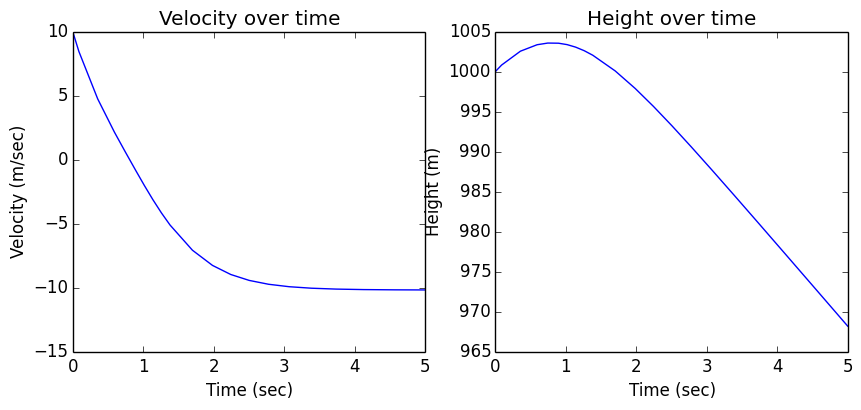

In [6]:
fig, ax = subplots(1, 2, sharex=true, figsize=(10,4))

ax[1][:plot](t, v)
ax[1][:set_title]("Velocity over time");
ax[1][:set_xlabel]("Time (sec)")
ax[1][:set_ylabel]("Velocity (m/sec)")

ax[2][:plot](t, y)
ax[2][:set_title]("Height over time");
ax[2][:set_xlabel]("Time (sec)")
ax[2][:set_ylabel]("Height (m)");


As you can see, the velocity starts at 10 $m/s^2$, with the ball going up. Its velocity starts decreasing, goes to zero at max height, and then becomes negative as the ball starts coming down. After a while it reaches its maximum speed: terminal velocity. 

The theorerically [terminal velocity](http://en.wikipedia.org/wiki/Terminal_velocity), $V_t$, is:

$$ V_t = \sqrt{\frac{2 m g}{\rho A C_D}} $$

Calculating it is easy enough:

In [7]:
vt = sqrt( (2.0*m*g) / (p*A*Cd) )

10.197118685526071

Now, with our numerical simulation, the terminal velocity is:

In [8]:
# The terminal velocity
vt_numeric = abs(minimum(v))

10.190666752444804

Now, that's what I call pretty neat!

---

# MIT LICENSE

> Copyright (C) 2014 Paulo Marques (pjp.marques@gmail.com)
>
> Permission is hereby granted, free of charge, to any person obtaining a copy of 
> this software and associated documentation files (the "Software"), to deal in
> the Software without restriction, including without limitation the rights to
> use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
> the Software, and to permit persons to whom the Software is furnished to do so,
> subject to the following conditions:
>  
> The above copyright notice and this permission notice shall be included in all 
> copies or substantial portions of the Software.
> 
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
> FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
> COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
> IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN 
> CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.